In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras

In [2]:
diamond_df = pd.read_csv("/content/diamonds.csv")
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamond_df.shape

(53940, 11)

In [4]:
diamond_df = diamond_df.drop(columns=["Unnamed: 0"])

In [5]:
diamond_df.shape

(53940, 10)

In [6]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamond_df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
diamond_df.loc[(diamond_df['x']==0) | (diamond_df['y']==0) | (diamond_df['z']==0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(diamond_df[(diamond_df['x']==0) | (diamond_df['y']==0) | (diamond_df['z']==0)])

20

The minimum values for X, Y, and Z appear to be zero, which doesn’t make sense since it’s not possible for the length, width, or height to be zero. There are 20 rows with dimensions of zero, and it seems more appropriate to drop these rows rather than filling them with the mean or median.

In [12]:
# Dropping rows with zero dimension
df = diamond_df[(diamond_df[['x','y','z']] != 0).all(axis=1)]

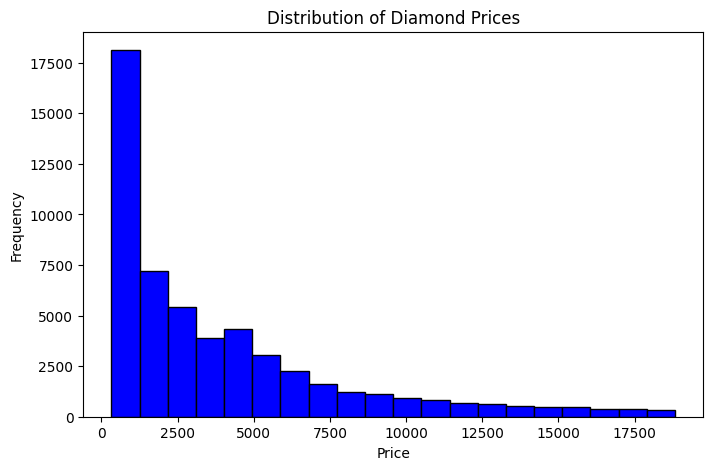

In [13]:
# Overall distribution of diamond prices in the dataset
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

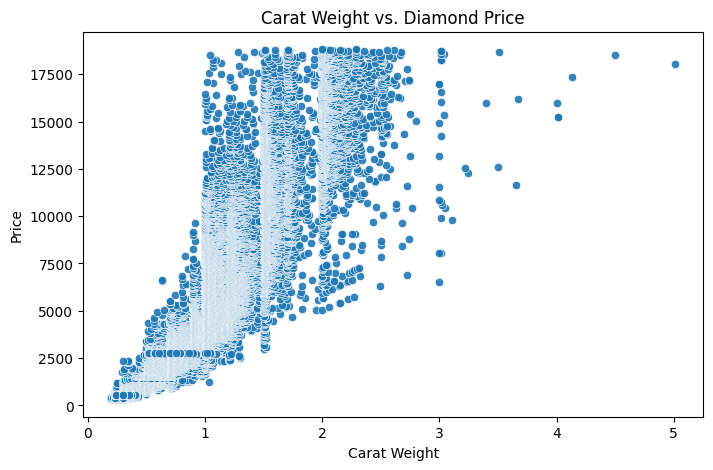

In [14]:
# How does carat weight relate to the price of diamonds?
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.9)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Carat Weight vs. Diamond Price')
plt.show()

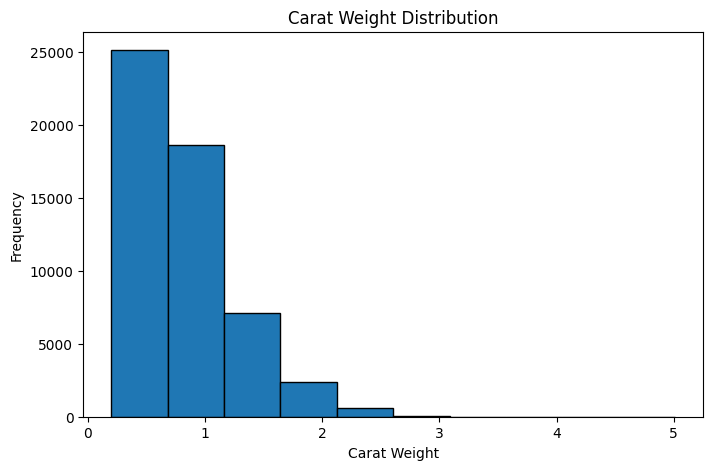

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['carat'], bins=10, edgecolor='k')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Carat Weight Distribution')
plt.show()

In [16]:
# How does the cut quality affect the diamond prices?
cut_quality_prices = df.groupby('cut')['price'].mean()
cut_quality_prices

,price
cut,
Fair,4357.500932
Good,3926.403509
Ideal,3456.941201
Premium,4579.684543
Very Good,3981.664101


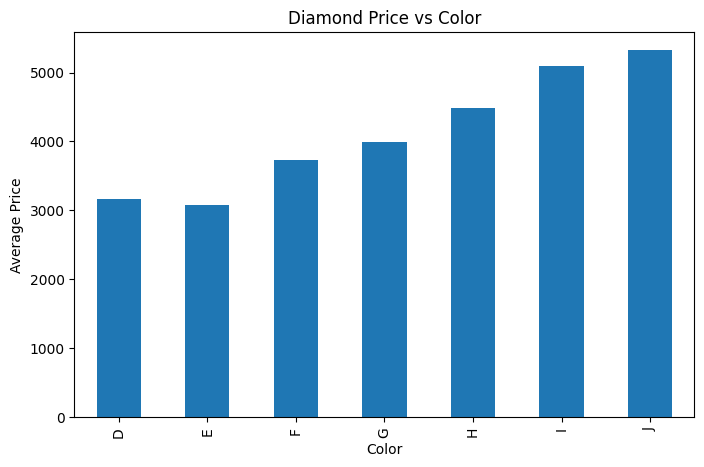

In [17]:
# Relationship between diamond color and their prices
color_prices = df.groupby('color')['price'].mean()

plt.figure(figsize=(8,5))
color_prices.plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Diamond Price vs Color')
plt.show()

,count
cut,
Ideal,21548
Premium,13780
Very Good,12081
Good,4902
Fair,1609


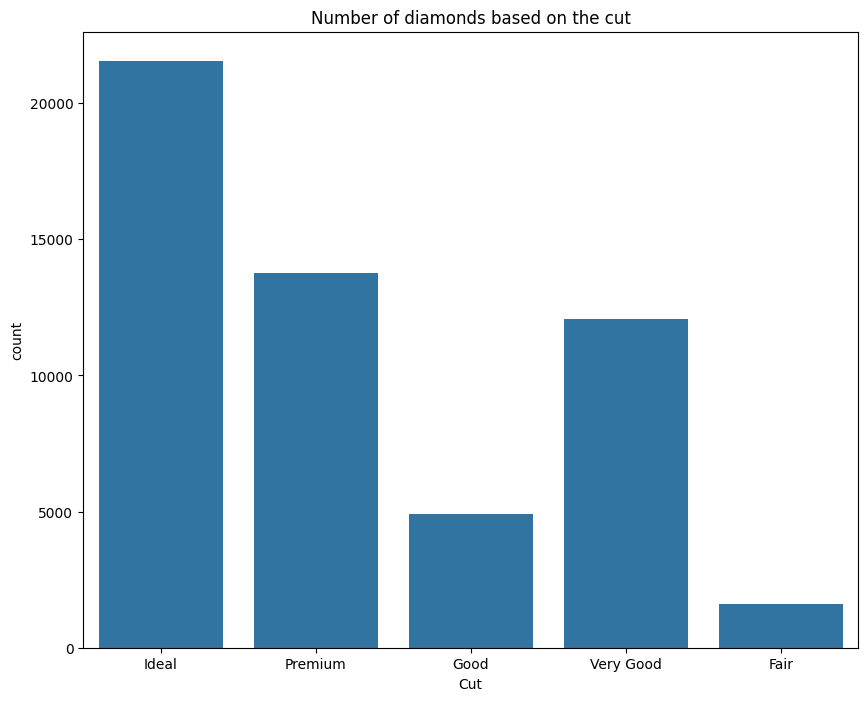

In [18]:
display(pd.DataFrame(df['cut'].value_counts()))

plt.figure(figsize = (10, 8))
sns.countplot(x = df['cut'])
plt.title('Number of diamonds based on the cut')
plt.xlabel('Cut')
plt.show()

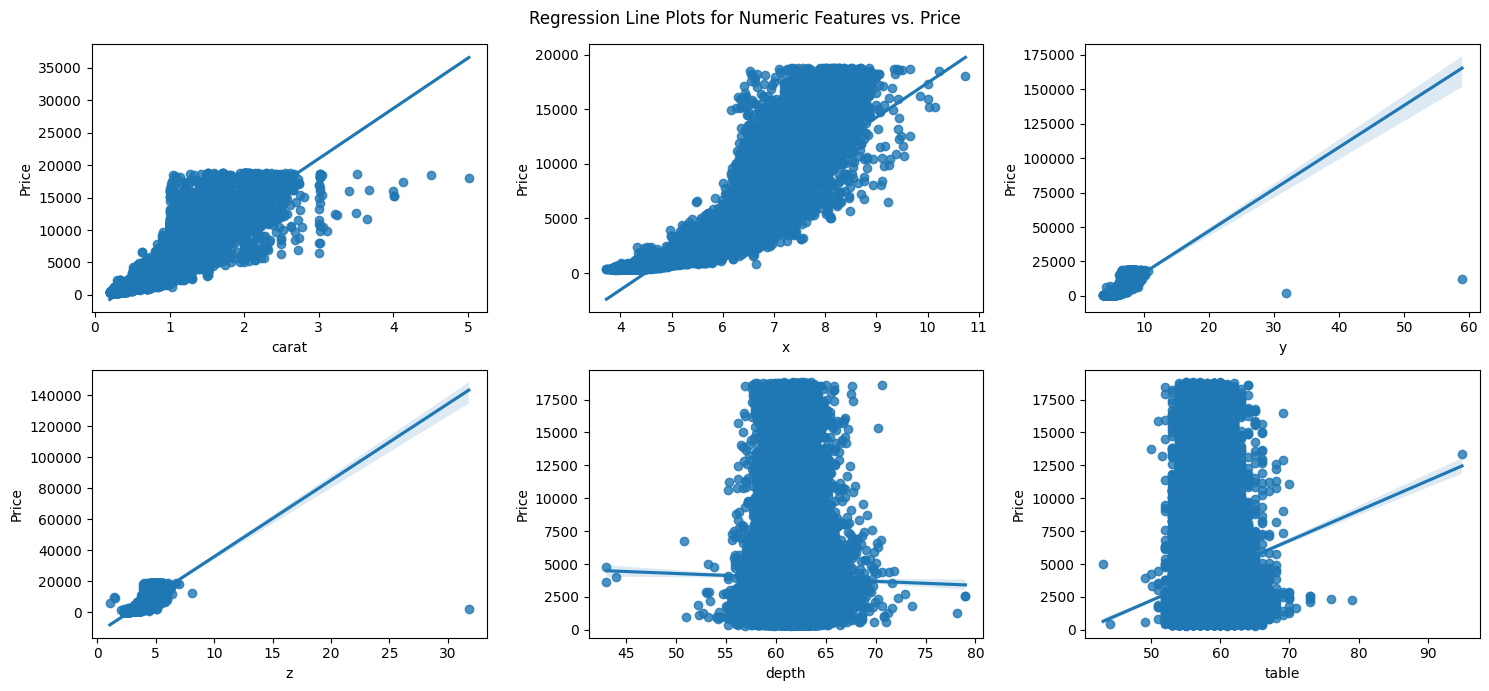

In [19]:
# Regression line plot

numeric_features = ['carat', 'x', 'y', 'z', 'depth', 'table']

fig, ax = plt.subplots(2, 3, figsize=(15,7))
fig.suptitle('Regression Line Plots for Numeric Features vs. Price')

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    sns.regplot(x=feature, y='price', data=df, ax=ax[row, col])
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [20]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)

(43136, 9) (10784, 9)


In [21]:
label_encoder = LabelEncoder()

X_train['cut'] = label_encoder.fit_transform(X_train['cut'])
X_test['cut'] = label_encoder.transform(X_test['cut'])

X_train['color'] = label_encoder.fit_transform(X_train['color'])
X_test['color'] = label_encoder.transform(X_test['color'])

X_train['clarity'] = label_encoder.fit_transform(X_train['clarity'])
X_test['clarity'] = label_encoder.transform(X_test['clarity'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [22]:
R2_Scores = []
RMSE_Scores = []
MAE_Scores = []
models = ['Linear Regression' ,  'Ridge Regression' , 'XG Boost Regression' , 'DecisionTree Regression', 'KNN Regression' , 'RandomForest Regression']

In [23]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('Linear Regression ')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)


Linear Regression 
Score : 0.8824
[0.88551284 0.87858555 0.88370278 0.88701723 0.78725881]

MSE    : 1766307.23 
MAE    : 843.38 
RMSE   : 1329.02 
R2     : 0.88 


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create Ridge regression model
clf_rr = Ridge()

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
clf_rr.fit(X_train_scaled, y_train)

# Cross-validation scores
accuracies = cross_val_score(estimator=clf_rr, X=X_train_scaled, y=y_train, cv=5)

# Predict on the test data
y_pred = clf_rr.predict(X_test_scaled)

# Print Ridge Regression results
print('\nRidge Regression')
print(f'Score: {clf_rr.score(X_test_scaled, y_test):.4f}')

# Print cross-validation accuracies
print("Cross-validation accuracies:", accuracies)

# Calculate MSE, MAE, RMSE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**0.5  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print('\nMSE    : %.2f' % mse)
print('MAE    : %.2f' % mae)
print('RMSE   : %.2f' % rmse)
print('R2     : %.2f' % r2)

# Append results to the respective lists
R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)


Ridge Regression
Score: 0.8824
Cross-validation accuracies: [0.88550551 0.87859241 0.88370655 0.88701864 0.79227654]

MSE    : 1766428.46
MAE    : 843.49
RMSE   : 1329.07
R2     : 0.88


In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Convert y_train to numpy array
y_train = np.array(y_train)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

accuracies = []

# Cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    # Perform numpy slicing
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    # Fit the model on the training data
    xgb_model.fit(X_train_cv, y_train_cv)

    # Predict on the validation set
    y_val_pred = xgb_model.predict(X_val_cv)

    # Calculate the R² score for this fold
    fold_r2 = r2_score(y_val_cv, y_val_pred)
    accuracies.append(fold_r2)

# Make predictions on the test dataset
y_pred = xgb_model.predict(X_test_scaled)

# Print XGBoost results
print('\nXGBoost Regression')
print(f'Score: {xgb_model.score(X_test_scaled, y_test):.4f}')

# Print cross-validation accuracies
print("Cross-validation accuracies:", accuracies)

# Calculate MSE, MAE, RMSE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print('\nMSE    : %.2f' % mse)
print('MAE    : %.2f' % mae)
print('RMSE   : %.2f' % rmse)
print('R2     : %.2f' % r2)

# Append results to the respective lists
R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)


XGBoost Regression
Score: 0.9802
Cross-validation accuracies: [0.9819080233573914, 0.9816808104515076, 0.9782794117927551, 0.9805034399032593, 0.9802407026290894]

MSE    : 297087.72
MAE    : 274.04
RMSE   : 545.06
R2     : 0.98


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    # Convert X_train_scaled to numpy array if it's a pandas DataFrame
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    # Fit the model on the training data
    tree_model.fit(X_train_cv, y_train_cv)

    # Predict on the validation set
    y_val_pred = tree_model.predict(X_val_cv)

    # Calculate the R² score for this fold
    fold_r2 = r2_score(y_val_cv, y_val_pred)
    accuracies.append(fold_r2)

# Make predictions on the test dataset
y_pred = tree_model.predict(X_test_scaled)

# Print Decision Tree results
print('\nDecision Tree Regression')
print(f'Score: {tree_model.score(X_test_scaled, y_test):.4f}')

# Print cross-validation accuracies
print("Cross-validation accuracies:", accuracies)

# Calculate MSE, MAE, RMSE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print('\nMSE    : %.2f' % mse)
print('MAE    : %.2f' % mae)
print('RMSE   : %.2f' % rmse)
print('R2     : %.2f' % r2)

# Append results to the respective lists
R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)



Decision Tree Regression
Score: 0.9637
Cross-validation accuracies: [0.96377049837636, 0.9603694498474701, 0.9646714006314866, 0.963428803272294, 0.9625416002052835]

MSE    : 545921.10
MAE    : 360.69
RMSE   : 738.86
R2     : 0.96


In [28]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print(' KNeighbours Regression ')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)


 KNeighbours Regression 
Score : 0.9485
[0.94137774 0.94492817 0.94630502 0.94589762 0.94208828]

MSE    : 773177.90 
MAE    : 466.93 
RMSE   : 879.31 
R2     : 0.95 


In [29]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print(' Random Forest ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
RMSE_Scores.append(rmse)
MAE_Scores.append(mae)


 Random Forest 
Score : 0.9819
[0.98032612 0.97946743 0.98071319 0.98025553 0.98055792]

MSE    : 272397.62 
MAE    : 258.30 
RMSE   : 521.92 
R2     : 0.98 


In [30]:
print(len(models))
print(len(R2_Scores))
print(len(RMSE_Scores))
print(len(MAE_Scores))


6
6
6
6


In [31]:
compare = pd.DataFrame({
    'Algorithms': models,
    'R2-Scores': R2_Scores,
    'RMSE Scores': RMSE_Scores,
    'MAE Scores': MAE_Scores
})
print(compare)

                Algorithms  R2-Scores  RMSE Scores  MAE Scores
0        Linear Regression   0.882396  1329.024916  843.381943
1         Ridge Regression   0.882388  1329.070525  843.486288
2      XG Boost Regression   0.980219   545.057537  274.037842
3  DecisionTree Regression   0.963652   738.864738  360.694965
4           KNN Regression   0.948521   879.305348  466.932659
5  RandomForest Regression   0.981863   521.917252  258.296138


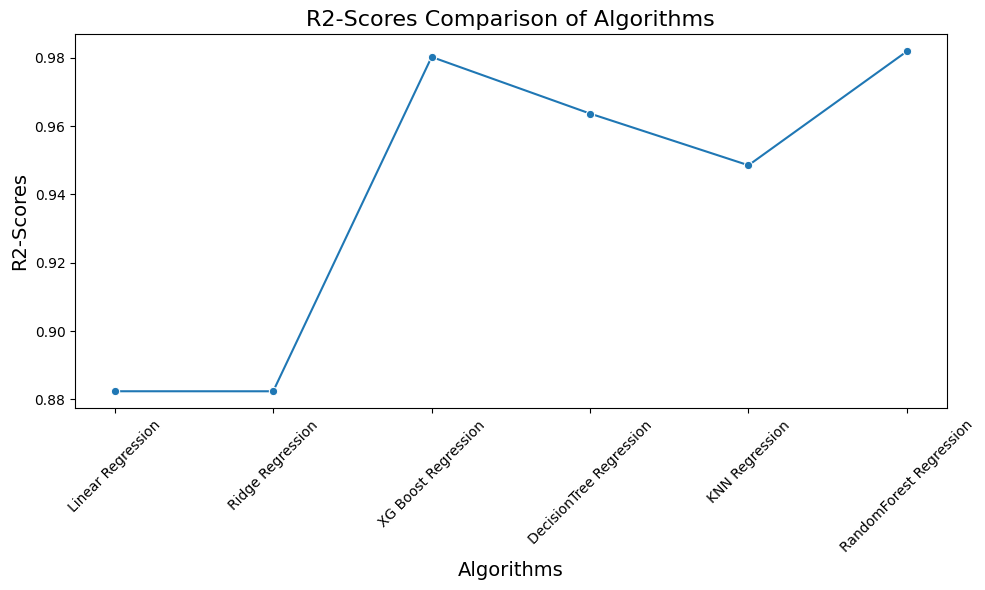

In [33]:
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(x='Algorithms', y='R2-Scores', data=compare, marker='o')

# Add titles and labels
plt.title('R2-Scores Comparison of Algorithms', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('R2-Scores', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Random Forest Regressor gives us the highest R2-Score

In [34]:
# DNN

output_size=1
hidden_layer=3
input_size=1
learning_rate=0.01
loss_function='mean_squared_error'
epochs=50
batch_size=10
model = keras.Sequential()
model.add(keras.layers.Dense(hidden_layer, activation = 'relu'))
model.add(keras.layers.Dense(output_size))
model.compile(keras.optimizers.Adam(learning_rate = learning_rate), loss_function)

In [35]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                    verbose = False, validation_split = 0.3)

In [37]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)

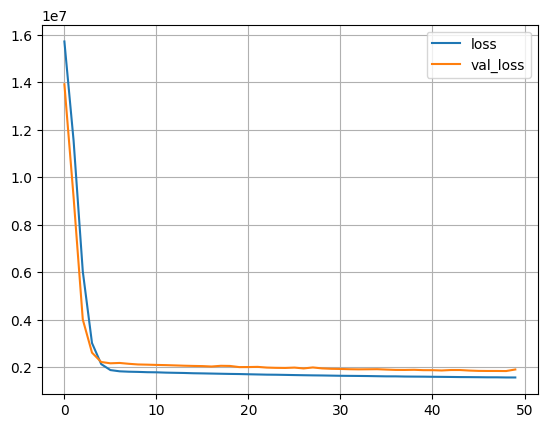

In [38]:
plot_loss(history)

In [39]:
y_pred = model.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Coefficient of determination:  0.8817010521888733
RMSE: 1332.9480485000156


In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(output_size))
model.compile(keras.optimizers.Adam(learning_rate = learning_rate), loss_function)

In [41]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                    verbose = False, validation_split = 0.3)

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Coefficient of determination:  0.8912239074707031
RMSE: 1278.1724257704827


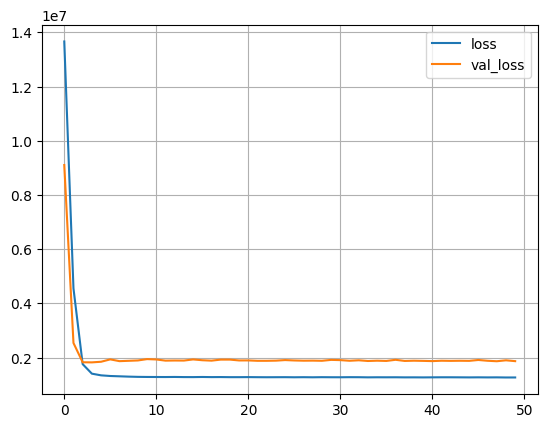

In [42]:
plot_loss(history)
y_pred = model.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))